In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings. simplefilter("ignore")

# Data import

In [2]:
df = pd.read_csv("my_movies.csv")
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df1 = df.iloc[:,5:]
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [4]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


# Data Cleaning

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [6]:
df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
df1.shape

(10, 10)

In [8]:
#creating an empty set
item_sets = {}

In [9]:
te = TransactionEncoder()
te_ary = te.fit(df1).transform(df1)
ap = pd.DataFrame(te_ary, columns=te.columns_)

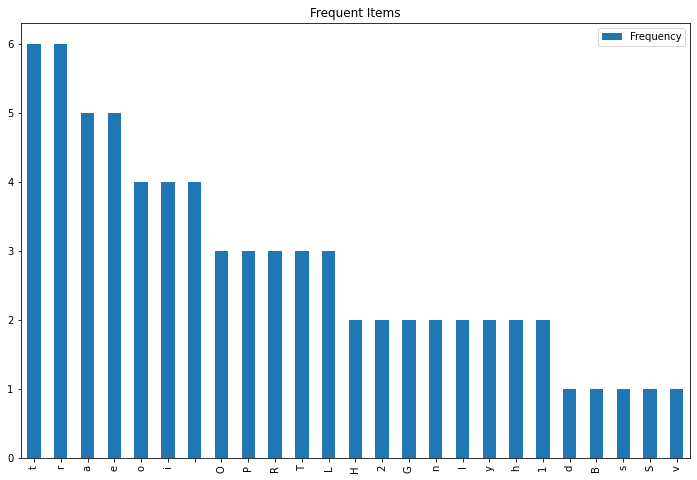

In [10]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

#  Apriori algorithm

In [11]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [12]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [13]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [14]:
confs = []

In [15]:
for i in [0.005,0.001,0.003,0.007]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

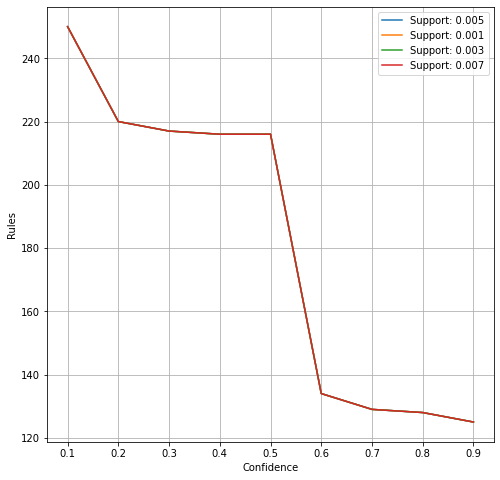

In [16]:
all_conf = pd.concat(confs,axis=1)
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# Conclusion

In [17]:
# 1.Lower the Confidence level Higher the no. of rules.
# 2.Higher the Support, lower the no. of rules.

# Lets try with Support 0.005 and Confidence at 0.4

In [18]:
ap_final =  apriori(ap,0.005,True)
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
6,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
11,(e),( ),0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
...,...,...,...,...,...,...,...,...,...
113703,"(2, H)","(r, P, e, a, o, , y, t)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113704,"(o, 2)","(r, P, e, a, H, , y, t)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113705,"(2, )","(r, P, e, a, H, o, y, t)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113706,"(y, 2)","(r, P, e, a, H, o, , t)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [19]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

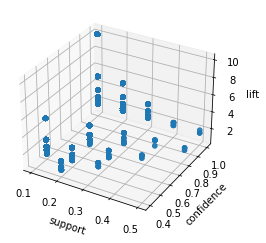

In [20]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

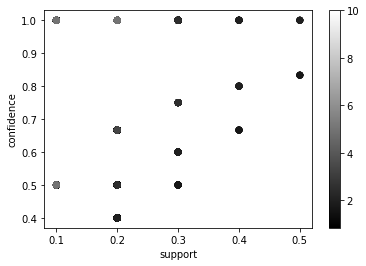

In [21]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")